In the first block, we have imported the required libraries and converted the dataset into the required format. We have also plotted the required plots and visualised the data.

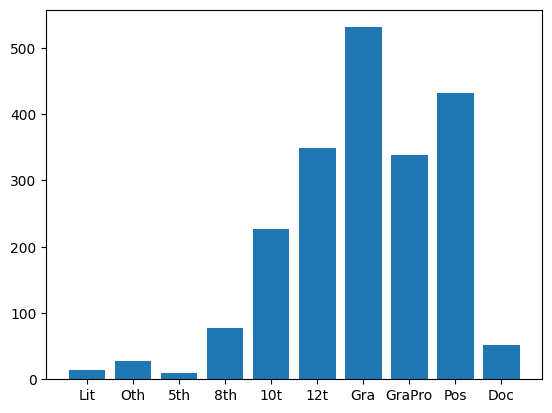

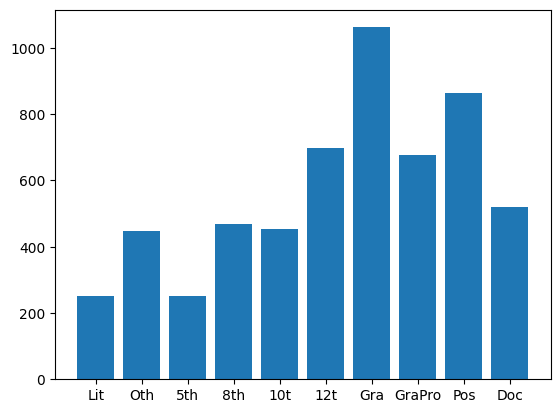

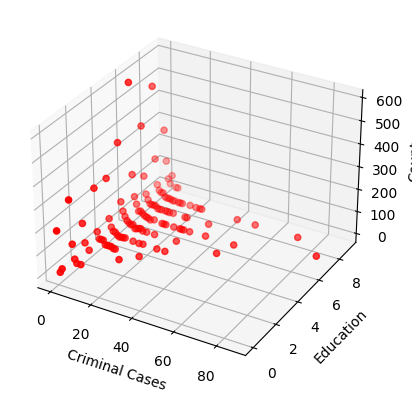

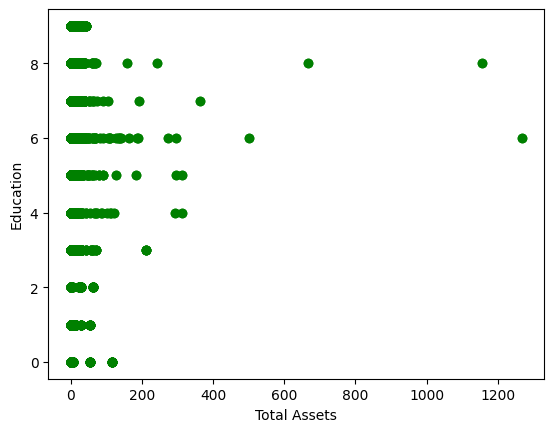

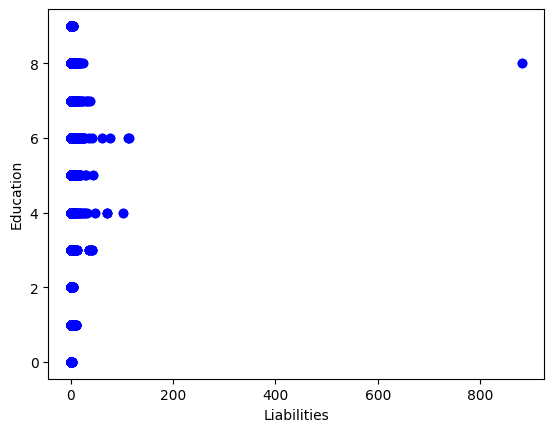

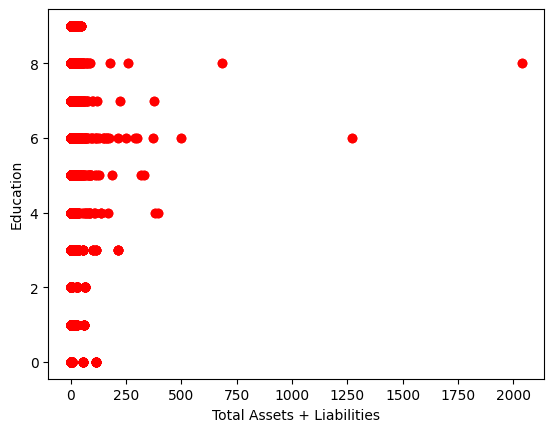

5382
Index(['Criminal Case', 'Total Assets', 'Liabilities', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'DELHI', 'GOA',
       'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA',
       'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
       'AAP', 'AIADMK', 'AITC', 'BJD', 'BJP', 'CPI', 'CPI(M)', 'DMK', 'INC',
       'IND', 'JD(S)', 'JD(U)', 'JMM', 'NCP', 'NDPP', 'NPP', 'RJD', 'SHS',
       'SP', 'Sikkim Krantikari Morcha', 'TDP', 'Tipra Motha Party', 'YSRCP',
       'CENTRAL', 'SC', 'ST', 'Adv', 'Dr', 'Prof'],
      dtype='object')

Index(['10th Pass', '12th Pass', '5th Pass', '8th Pass', 'Doctorate',
       'Graduate', 'Graduate Professional', 'Literate', 'Others',
       'Post Graduate'],
      dtype='object')

Index(['Criminal Case', 'Total Assets', 'Liabilitie

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

y_train = train['Education']

dic = {'Literate':0, 'Others':1, '5th Pass':2, '8th Pass':3, '10th Pass':4, '12th Pass':5,  'Graduate':6, 'Graduate Professional':7, 'Post Graduate':8, 'Doctorate':9}

count = {'Literate':0, 'Others':0, '5th Pass':0, '8th Pass':0, '10th Pass':0, '12th Pass':0,  'Graduate':0, 'Graduate Professional':0, 'Post Graduate':0, 'Doctorate':0}

for i in range(len(y_train)):
    count[y_train[i]] += 1

x = []
y = []

for i in count.keys():
    if i == 'Graduate Professional':
        x.append('GraPro')
    else:
        x.append(i[0:3])
    y.append(count[i])

plt.bar(x, y)
plt.show()

literate_rows = train[train['Education'] == 'Literate']
repeated_rows = pd.concat([literate_rows] * 8, ignore_index=True)
train = pd.concat([train, repeated_rows], ignore_index=True)

literate_rows = train[train['Education'] == 'Others']
repeated_rows = pd.concat([literate_rows] * 7, ignore_index=True)
train = pd.concat([train, repeated_rows], ignore_index=True)

literate_rows = train[train['Education'] == '5th Pass']
repeated_rows = pd.concat([literate_rows] * 13, ignore_index=True)
train = pd.concat([train, repeated_rows], ignore_index=True)

literate_rows = train[train['Education'] == '8th Pass']
repeated_rows = pd.concat([literate_rows] * 2, ignore_index=True)
train = pd.concat([train, repeated_rows], ignore_index=True)

literate_rows = train[train['Education'] == 'Doctorate']
repeated_rows = pd.concat([literate_rows] * 4, ignore_index=True)
train = pd.concat([train, repeated_rows], ignore_index=True)

train = pd.concat([train, train], ignore_index=True)

y_train = train['Education']

criminal_cases = train['Criminal Case']

count = {'Literate':0, 'Others':0, '5th Pass':0, '8th Pass':0, '10th Pass':0, '12th Pass':0,  'Graduate':0, 'Graduate Professional':0, 'Post Graduate':0, 'Doctorate':0}

for i in range(len(y_train)):
    count[y_train[i]] += 1

x = []
y = []

for i in count.keys():
    if i == 'Graduate Professional':
        x.append('GraPro')
    else:
        x.append(i[0:3])
    y.append(count[i])

plt.bar(x, y)
plt.show()


count = {}

for i in range(len(criminal_cases)):
    s = 10*criminal_cases[i]+dic[y_train[i]]
    if s in count.keys():
        count[s] += 1
    else:
        count[s] = 1

x=[]
y=[]
z=[]

for i in count.keys():
    x.append(i//10)
    y.append(i%10)
    z.append(count[i])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Criminal Cases')
ax.set_ylabel('Education')
ax.set_zlabel('Count')
plt.show()

train.drop(columns=['Education'], inplace=True)

state_dummies = pd.get_dummies(train['state'])
state_dummies = state_dummies.astype(float)
train = pd.concat([train, state_dummies], axis=1)
train.drop(columns=['state'], inplace=True)

test_state_dummies = pd.get_dummies(test['state'])
test_state_dummies = test_state_dummies.astype(float)
test = pd.concat([test, test_state_dummies], axis=1)
test.drop(columns=['state'], inplace=True)

party_dummies = pd.get_dummies(train['Party'])
party_dummies = party_dummies.astype(float)
train = pd.concat([train, party_dummies], axis=1)
train.drop(columns=['Party'], inplace=True)

test_party_dummies = pd.get_dummies(test['Party'])
test_party_dummies = test_party_dummies.astype(float)
test = pd.concat([test, test_party_dummies], axis=1)
test.drop(columns=['Party'], inplace=True)


def convert_to_crores(value):
    if 'Crore+' in value:
        return float(value.split()[0])
    elif 'Lac+' in value:
        return float(value.split()[0]) / 100
    else:
        return 0.0

train['Total Assets'] = train['Total Assets'].apply(convert_to_crores)
train['Liabilities'] = train['Liabilities'].apply(convert_to_crores)

test['Total Assets'] = test['Total Assets'].apply(convert_to_crores)
test['Liabilities'] = test['Liabilities'].apply(convert_to_crores)


x=[]
y=[]

for i in range(len(train['Total Assets'])):
    x.append(train['Total Assets'][i])
    y.append(dic[y_train[i]])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c='g', marker='o')
ax.set_xlabel('Total Assets')
ax.set_ylabel('Education')
plt.show()

x=[]
y=[]

for i in range(len(train['Liabilities'])):
    x.append(train['Liabilities'][i])
    y.append(dic[y_train[i]])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c='b', marker='o')
ax.set_xlabel('Liabilities')
ax.set_ylabel('Education')
plt.show()

x=[]
y=[]

for i in range(len(train['Liabilities'])):
    x.append(train['Total Assets'][i] + train['Liabilities'][i])
    y.append(dic[y_train[i]])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c='r', marker='o')
ax.set_xlabel('Total Assets + Liabilities')
ax.set_ylabel('Education')
plt.show()


y_train_dummies = pd.get_dummies(y_train)
y_train_dummies = y_train_dummies.astype(float)
y_train = pd.concat([y_train, y_train_dummies], axis=1)
y_train.drop(columns=['Education'], inplace=True)

count_nothing = 0

def cons(value):
    if '(' in value:
        return value.split('(')[1].split(')')[0]
    else:
        return 'Nothing'

train['Constituency ∇'] = train['Constituency ∇'].apply(cons)
test['Constituency ∇'] = test['Constituency ∇'].apply(cons)

constituency_dummies = pd.get_dummies(train['Constituency ∇'])
constituency_dummies = constituency_dummies.astype(float)
train = pd.concat([train, constituency_dummies], axis=1)
train.drop(columns=['Constituency ∇'], inplace=True)

test_constituency_dummies = pd.get_dummies(test['Constituency ∇'])
test_constituency_dummies = test_constituency_dummies.astype(float)
test = pd.concat([test, test_constituency_dummies], axis=1)
test.drop(columns=['Constituency ∇'], inplace=True)

def pos(value):
    if 'Dr.' in value:
        return 'Dr'
    elif 'Adv.' in value:
        return 'Adv'
    elif 'Prof.' in value:
        return 'Prof'
    else:
        global count_nothing
        count_nothing += 1
        return "No"

train['Candidate'] = train['Candidate'].apply(pos)
print(count_nothing)
test['Candidate'] = test['Candidate'].apply(pos)

train_constituency_dummies = pd.get_dummies(train['Candidate'])
train_constituency_dummies = train_constituency_dummies.astype(float)
train = pd.concat([train, train_constituency_dummies], axis=1)
train.drop(columns=['Candidate'], inplace=True)

test_constituency_dummies = pd.get_dummies(test['Candidate'])
test_constituency_dummies = test_constituency_dummies.astype(float)
test = pd.concat([test, test_constituency_dummies], axis=1)
test.drop(columns=['Candidate'], inplace=True)

train = train.drop(columns=['ID'])
test = test.drop(columns=['ID'])

train = train.drop(columns=['Nothing'])
test = test.drop(columns=['Nothing'])
train = train.drop(columns=['No'])
test = test.drop(columns=['No'])

train = train[test.columns]

x_train = train

x, x_test, y, y_test = train_test_split(train, y_train, test_size=0.2, random_state=1000)

print(train.columns)
print()
print(y_train.columns)
print()
print(test.columns)

In this section we have implemented the Random Forest Regressor model and trained it

In [323]:
# Best parameters after grid search for many hyperparameters
param_grid = {
    'n_estimators': [275],
    'max_depth': [1000],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

rf_regressor = RandomForestRegressor(random_state=1000)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=10, scoring='f1_weighted', verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_


Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.5s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.2s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.3s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.5s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.9s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.8s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.3s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   6.0s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.9s


C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debra\AppData\Roaming\Python\Python311\site-packages\sklearn\met

[CV] END max_depth=1000, min_samples_leaf=1, min_samples_split=10, n_estimators=275; total time=   5.7s
Best Parameters: {'max_depth': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 275}


In this section, we have created the confusion matrix for 20% of the train data

In [324]:
predicted = best_model.predict(x_test)
predicted_binary[np.arange(len(predicted)), predicted.argmax(axis=1)] = 1

y_test = y_test.values

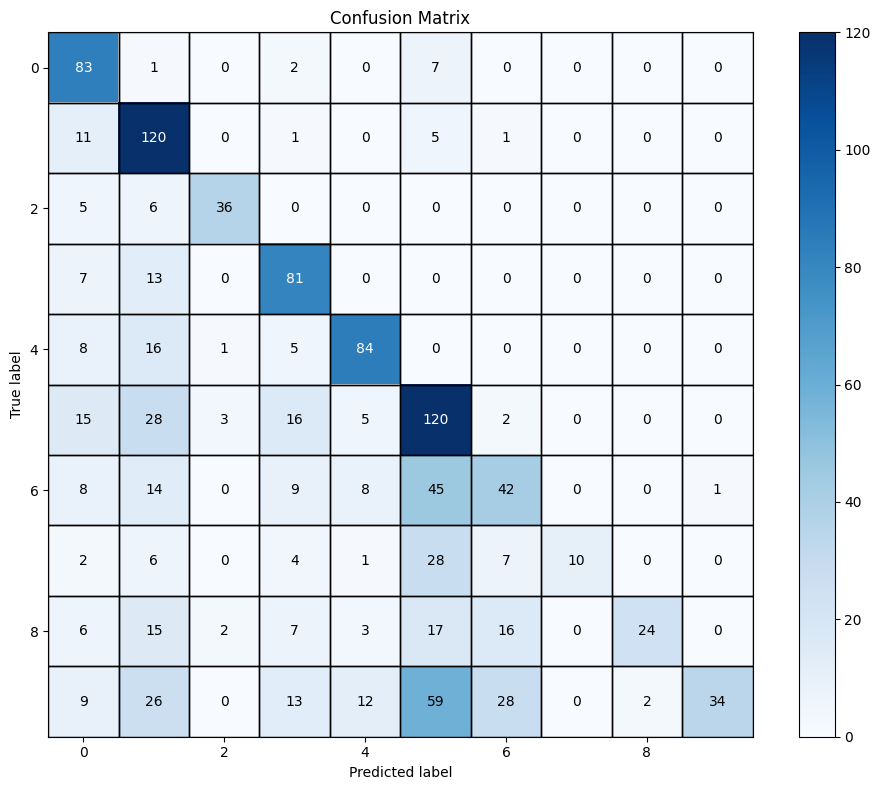

In [325]:
def generate_confusion_matrix(y_true, y_pred, num_classes):
    """
    Generate a confusion matrix.
    
    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        num_classes (int): Number of classes.
    
    Returns:
        array: Confusion matrix.
    """
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        cm[true_label, pred_label] += 1
    return cm

def plot_confusion_matrix(cm, labels=None):
    """
    Plot the confusion matrix.
    
    Args:
        cm (array-like): Confusion matrix.
        labels (array-like, optional): List of labels to index the matrix.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    if labels:
        tick_marks = np.arange(len(labels))
        plt.xticks(tick_marks, labels, rotation=45)
        plt.yticks(tick_marks, labels)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none'))

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

num_classes = 10

y_test_flat = y_test.argmax(axis=1)
predicted_binary_flat = predicted_binary.argmax(axis=1)

cm = generate_confusion_matrix(y_test_flat, predicted_binary_flat, num_classes)

plot_confusion_matrix(cm)


In this section, we have generated the result from the test data and writing it in the file named random_forest.csv

In [326]:
predicted_test = best_model.predict(test)
predicted_binary = np.zeros(predicted_test.shape)
predicted_binary[np.arange(len(predicted_test)), predicted_test.argmax(axis=1)] = 1


ans = []
education = ['10th Pass', '12th Pass', '5th Pass', '8th Pass', 'Doctorate', 'Graduate', 'Graduate Professional', 'Literate', 'Others', 'Post Graduate']
for i in range(len(predicted_binary)):
  for j in range(len(predicted_binary[i])):
    if predicted_binary[i][j] == 1:
      ans.append(education[j])
      break

with open('random_forest.csv', 'w', newline='') as csvfile:
    fieldnames = ['ID', 'Education']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for i in range(len(ans)):
        writer.writerow({'ID': i, 'Education': ans[i]})
